In [3]:
# import 
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Input, Dense, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import argparse
import numpy as np
import random

In [31]:
def createLearningData():
    # cifar10のデータ取得
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    showLabelData(x_test, y_test)
    x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2)
    # RGB画像で32×32なので32×32×3にreshapeする
    x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
    x_valid = x_valid.reshape(x_valid.shape[0], 32, 32, 3)
    x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_valid /= 255
    x_test /= 255

    # one-hot vector形式に変換する
    y_train = to_categorical(y_train, 10)
    y_valid = to_categorical(y_valid, 10)
    y_test = to_categorical(y_test, 10)
    
    return x_train, y_train, x_valid, y_valid, x_test, y_test

In [38]:
def showLabelData(x_test, y_test):

    CIFAR10_LABELS_LIST = [
        'airplane', 
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck'
    ]

    pos = 1
    #index = 0
    index = random.randint(0, x_test.shape[0]/2)
    i = index


    # plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
    plt.figure(figsize=(16,16))

    # draw cifar10 images and label names
    for img in x_test[index:index+30]:
        plt.subplot(10, 10, pos)
        plt.imshow(img)
        plt.axis('off')
        plt.title(CIFAR10_LABELS_LIST[y_test[i][0]],color="white")
        pos += 1
        i += 1

    plt.show()

In [39]:
def create_CNN_model(input_shape=(32, 32, 3), class_num=10):
    input = Input((32, 32, 3))
    kernel_size = (3, 3)
    max_pool_size = (2, 2)
    # 畳み込み層の実装
    # 1層目
    cnn = Conv2D(32, kernel_size=kernel_size, padding='same', strides=(1, 1), activation='relu', input_shape=(32, 32, 3))(input)
    cnn = MaxPooling2D(pool_size=max_pool_size, strides=(2, 2))(cnn)
    cnn = Conv2D(64, kernel_size, padding='same', strides=(1, 1), activation='relu')(cnn)
    cnn = MaxPooling2D(pool_size=max_pool_size, strides=(2, 2))(cnn)
    cnn = Dropout(0.25)(cnn)
    cnn = Conv2D(128, kernel_size, padding='same', strides=(1, 1), activation='relu')(cnn)
    cnn = MaxPooling2D(pool_size=max_pool_size, strides=(2, 2))(cnn)
    cnn = Conv2D(256, kernel_size, padding='same', strides=(1, 1), activation='relu')(cnn)
    cnn = MaxPooling2D(pool_size=max_pool_size, strides=(2, 2))(cnn)
    cnn = Dropout(0.25)(cnn)
    cnn = Conv2D(256, kernel_size, padding='same', strides=(1, 1), activation='relu')(cnn)
    # 入力を平滑化する層（いわゆるデータをフラット化する層、例えば4次元配列を1次元配列に変換するなど）
    fc = Flatten()(cnn)
    # denseは全結合層
    fc = Dense(1000, activation='relu')(fc)
    fc = Dropout(0.5)(fc)
    softmax = Dense(10, activation='softmax')(fc)
    model = Model(input=input, output=softmax)
    
    return model

def train(x_train, y_train, x_valid, y_valid, x_test, y_test):

    model = create_CNN_model()
    
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(),  metrics=['accuracy'])
    # 学習
    model.fit(x_train, y_train, epochs=40, batch_size=128, verbose=1, validation_data=(x_valid, y_valid))
    # 精度算出
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

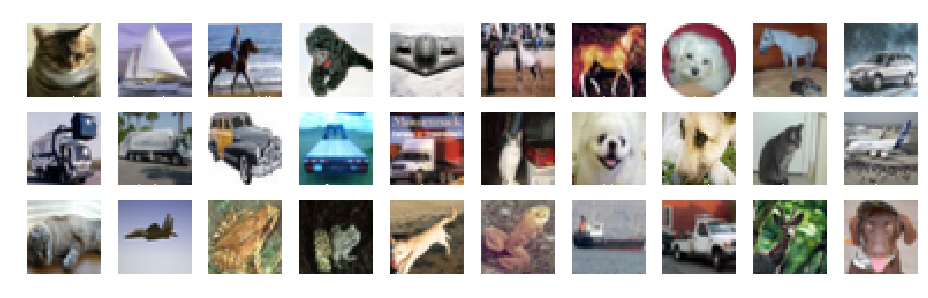

In [40]:
x_train, y_train, x_valid, y_valid, x_test, y_test = createLearningData()

In [3]:
train(x_train, y_train, x_valid, y_valid, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


170500096/170498071 [==============================] - 27s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 17s 335us/step - loss: 1.6595 - acc: 0.3770 - val_loss: 1.2747 - val_acc: 0.5328
Epoch 2/40
50000/50000 [==============================] - 12s 238us/step - loss: 1.2278 - acc: 0.5576 - val_loss: 1.0512 - val_acc: 0.6262
Epoch 3/40
50000/50000 [==============================] - 12s 237us/step - loss: 1.0145 - acc: 0.6388 - val_loss: 0.8183 - val_acc: 0.7041
Epoch 4/40
50000/50000 [==============================] - 12s 237us/step - loss: 0.8962 - acc: 0.6847 - val_loss: 0.7031 - val_acc: 0.7570
Epoch 5/40
50000/50000 [==============================] - 12s 238us/step - loss: 0.7995 - acc: 0.7170 - val_loss: 0.6211 - val_acc: 0.7850
Epoch 6/40
50000/50000 [==============================] - 12s 238us/step - loss: 0.7320 - acc: 0.7440 - val_loss: 0.5139 - val_acc: 0.8262
Epoch 7/40
50000/50000 [========================